In [1]:
import numpy as np
import os
import cv2
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# === Settings ===
IMG_SIZE = 256
BASE_DIR = "/kaggle/input/liver-dataset/liver"
SAVE_PATH = "/kaggle/working/liver_preprocessed_data.npz"

# === Print folder structure to confirm ===
print("📁 File structure under liver dataset:")
for dirname, _, filenames in os.walk(BASE_DIR):
    print(f"DIR: {dirname}")
    for filename in sorted(filenames)[:5]:
        print("  -", filename)

# === Loader that matches filename and mask by name ===
def load_images_and_masks(folder):
    files = sorted(os.listdir(folder))
    image_files = [f for f in files if "_mask" not in f]
    mask_files = [f for f in files if "_mask" in f]

    X, Y = [], []

    print(f"\n📦 Loading from: {folder}")
    for img_file in tqdm(image_files):
        id_prefix = img_file.replace(".png", "")
        mask_file = f"{id_prefix}_mask.png"

        img_path = os.path.join(folder, img_file)
        mask_path = os.path.join(folder, mask_file)

        if not os.path.exists(mask_path):
            print(f"⚠️ Skipping {img_file} - mask not found: {mask_file}")
            continue

        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

        if img is None or mask is None:
            print(f"⚠️ Skipping corrupted file: {img_file}")
            continue

        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        mask = cv2.resize(mask, (IMG_SIZE, IMG_SIZE))

        img = img.astype(np.float32) / 255.0
        mask = (mask > 127).astype(np.float32)

        img = np.expand_dims(img, axis=-1)
        mask = np.expand_dims(mask, axis=-1)

        X.append(img)
        Y.append(mask)

    return np.array(X), np.array(Y)

# === Load Data ===
X_train, y_train = load_images_and_masks(os.path.join(BASE_DIR, "train"))
X_val_full, y_val_full = load_images_and_masks(os.path.join(BASE_DIR, "val"))

# === Handle val/test split if val exists ===
if len(X_val_full) == 0:
    print("⚠️ No val data found. Splitting train into train/val/test...")
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.5, random_state=42)
else:
    print("✅ Using val folder. Splitting val into val/test...")
    X_val, X_test, y_val, y_test = train_test_split(X_val_full, y_val_full, test_size=0.3, random_state=42)

# === Save as .npz ===
np.savez(SAVE_PATH,
         X_train=X_train, y_train=y_train,
         X_val=X_val, y_val=y_val,
         X_test=X_test, y_test=y_test)

print("\n✅ Preprocessing complete. Saved to:", SAVE_PATH)
print("🔍 Shapes:")
print("X_train:", X_train.shape, "| y_train:", y_train.shape)
print("X_val:", X_val.shape, "| y_val:", y_val.shape)
print("X_test:", X_test.shape, "| y_test:", y_test.shape)

📁 File structure under liver dataset:
DIR: /kaggle/input/liver-dataset/liver
  - __init__.py
DIR: /kaggle/input/liver-dataset/liver/val
  - 000.png
  - 000_mask.png
  - 001.png
  - 001_mask.png
  - 002.png
DIR: /kaggle/input/liver-dataset/liver/train
  - 000.png
  - 000_mask.png
  - 001.png
  - 001_mask.png
  - 002.png

📦 Loading from: /kaggle/input/liver-dataset/liver/train


100%|██████████| 400/400 [00:03<00:00, 108.42it/s]



📦 Loading from: /kaggle/input/liver-dataset/liver/val


100%|██████████| 20/20 [00:00<00:00, 87.19it/s]


✅ Using val folder. Splitting val into val/test...

✅ Preprocessing complete. Saved to: /kaggle/working/liver_preprocessed_data.npz
🔍 Shapes:
X_train: (400, 256, 256, 1) | y_train: (400, 256, 256, 1)
X_val: (14, 256, 256, 1) | y_val: (14, 256, 256, 1)
X_test: (6, 256, 256, 1) | y_test: (6, 256, 256, 1)


2025-06-23 17:03:02.210579: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750698182.230037    2173 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750698182.235631    2173 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
I0000 00:00:1750698186.000984    2173 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1750698186.001787    2173 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability:

Epoch 1/100


I0000 00:00:1750698214.849631    2224 service.cc:148] XLA service 0x7db934005930 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1750698214.849689    2224 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1750698214.849696    2224 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1750698217.404975    2224 cuda_dnn.cc:529] Loaded cuDNN version 90300
I0000 00:00:1750698236.820989    2224 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


25/25 ━━━━━━━━━━━━━━━━━━━━ 59s 424ms/step - accuracy: 0.8141 - loss: 1.3287 - precision: 0.3063 - recall: 0.7211 - val_accuracy: 0.7924 - val_loss: 1.5707 - val_precision: 0.2415 - val_recall: 1.0000
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 144ms/step - accuracy: 0.9766 - loss: 1.0184 - precision: 0.8090 - recall: 0.9634 - val_accuracy: 0.7744 - val_loss: 1.5601 - val_precision: 0.2266 - val_recall: 1.0000
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 144ms/step - accuracy: 0.9805 - loss: 0.9127 - precision: 0.8418 - recall: 0.9740 - val_accuracy: 0.7841 - val_loss: 1.5496 - val_precision: 0.2343 - val_recall: 1.0000
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 146ms/step - accuracy: 0.9821 - loss: 0.8660 - precision: 0.8523 - recall: 0.9733 - val_accuracy: 0.8125 - val_loss: 1.5220 - val_precision: 0.2605 - val_recall: 0.9991
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 147ms/step - accuracy: 0.9871 - loss: 0.8024 - precision: 0.8910 - recall: 0.9826 - val_accuracy: 0.8882 - val_loss: 1.4782 -

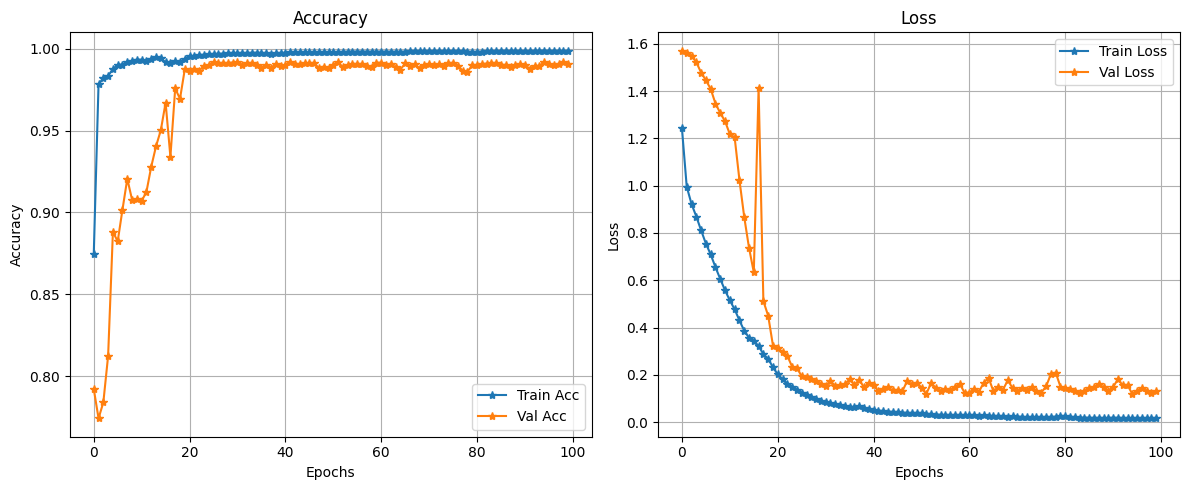

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


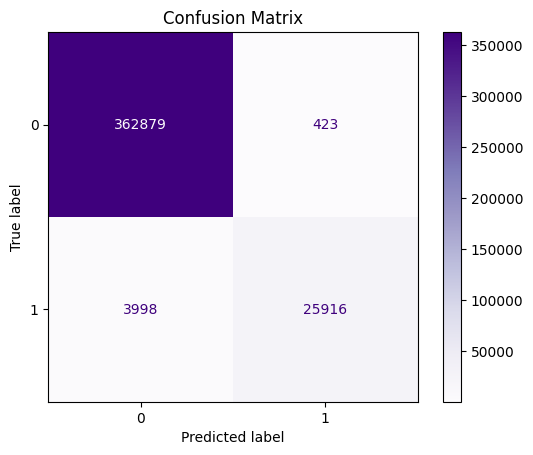


Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99    363302
         1.0       0.98      0.87      0.92     29914

    accuracy                           0.99    393216
   macro avg       0.99      0.93      0.96    393216
weighted avg       0.99      0.99      0.99    393216



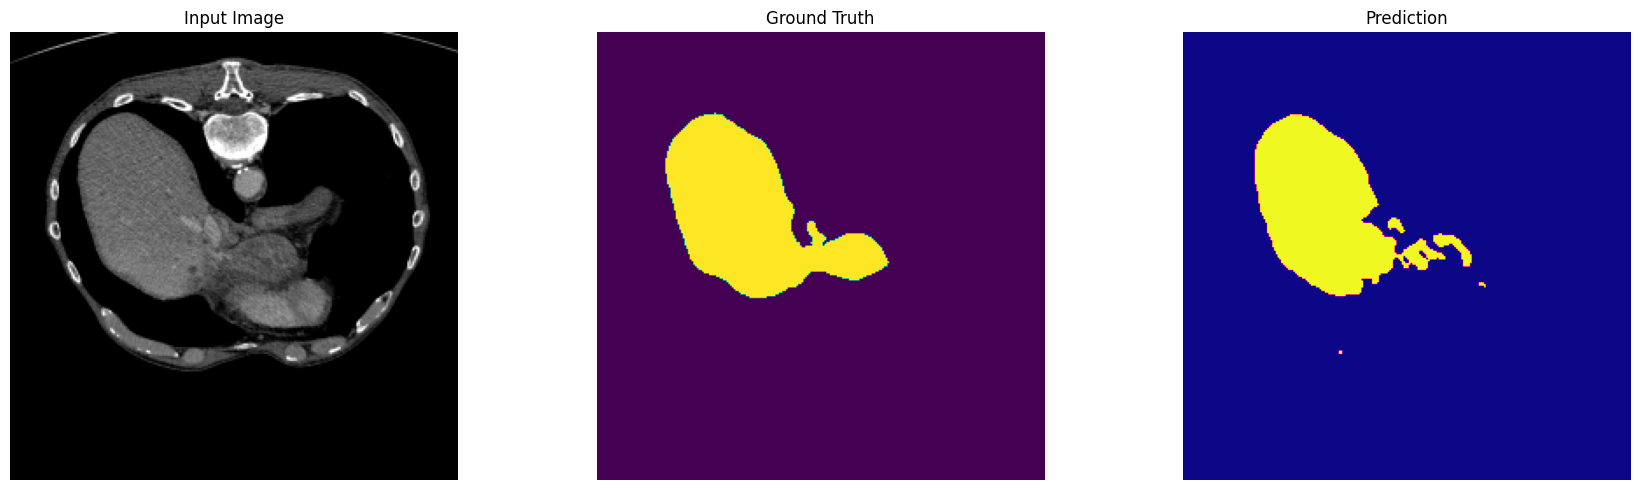

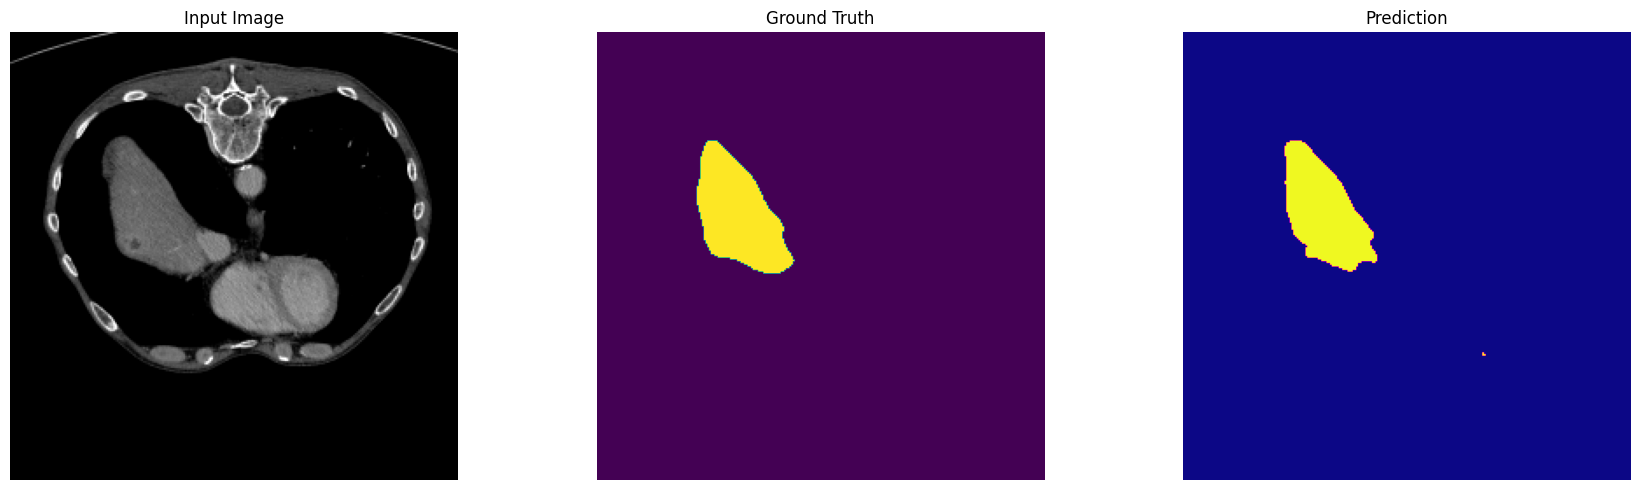

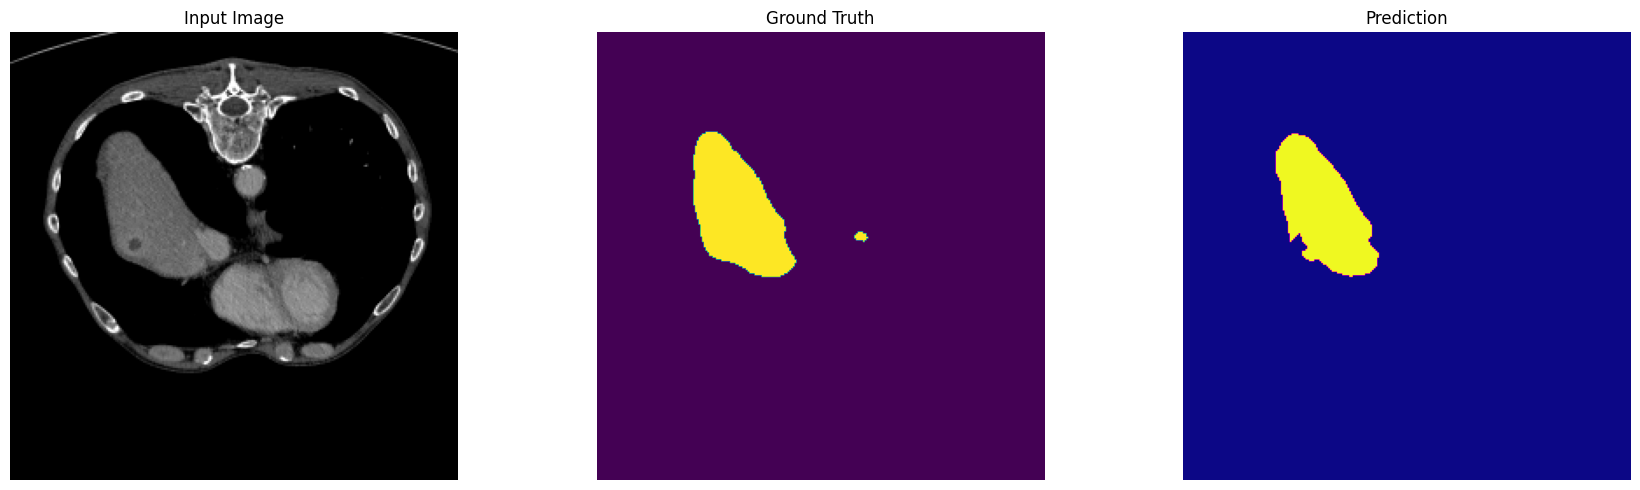

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models, metrics
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# === Load Data ===
data = np.load("/kaggle/working/liver_preprocessed_data.npz")
X_train, y_train = data["X_train"], data["y_train"]
X_val, y_val = data["X_val"], data["y_val"]
X_test, y_test = data["X_test"], data["y_test"]

# === Dice Loss ===
def dice_loss(y_true, y_pred):
    smooth = 1.0
    y_true_f = tf.reshape(y_true, [-1])
    y_pred_f = tf.reshape(y_pred, [-1])
    intersection = tf.reduce_sum(y_true_f * y_pred_f)
    return 1 - ((2. * intersection + smooth) / 
                (tf.reduce_sum(y_true_f) + tf.reduce_sum(y_pred_f) + smooth))

def bce_dice_loss(y_true, y_pred):
    bce = tf.keras.losses.binary_crossentropy(y_true, y_pred)
    d_loss = dice_loss(y_true, y_pred)
    return bce + d_loss

# === SE Attention Block ===
def se_block(input_tensor, reduction=16):
    channels = input_tensor.shape[-1]
    se = layers.GlobalAveragePooling2D()(input_tensor)
    se = layers.Dense(channels // reduction, activation='relu')(se)
    se = layers.Dense(channels, activation='sigmoid')(se)
    se = layers.Reshape((1, 1, channels))(se)
    return layers.Multiply()([input_tensor, se])

# === Convolution Block ===
def conv_block(x, filters, kernel_size=3, activation='relu', attention=True):
    x = layers.Conv2D(filters, kernel_size, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation(activation)(x)
    x = layers.Conv2D(filters, kernel_size, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation(activation)(x)
    if attention:
        x = se_block(x)
    return x

# === Attention U-Net ===
def build_attention_unet(input_shape, num_classes, base_filters=16, attention=True):
    inputs = layers.Input(shape=input_shape)

    e1 = conv_block(inputs, base_filters, attention=attention)
    p1 = layers.MaxPooling2D((2, 2))(e1)

    e2 = conv_block(p1, base_filters * 2, attention=attention)
    p2 = layers.MaxPooling2D((2, 2))(e2)

    e3 = conv_block(p2, base_filters * 4, attention=attention)
    p3 = layers.MaxPooling2D((2, 2))(e3)

    e4 = conv_block(p3, base_filters * 8, attention=attention)
    p4 = layers.MaxPooling2D((2, 2))(e4)

    b = conv_block(p4, base_filters * 16, attention=attention)

    u4 = layers.Conv2DTranspose(base_filters * 8, 2, strides=(2, 2), padding='same')(b)
    u4 = layers.Concatenate()([u4, e4])
    d4 = conv_block(u4, base_filters * 8, attention=attention)

    u3 = layers.Conv2DTranspose(base_filters * 4, 2, strides=(2, 2), padding='same')(d4)
    u3 = layers.Concatenate()([u3, e3])
    d3 = conv_block(u3, base_filters * 4, attention=attention)

    u2 = layers.Conv2DTranspose(base_filters * 2, 2, strides=(2, 2), padding='same')(d3)
    u2 = layers.Concatenate()([u2, e2])
    d2 = conv_block(u2, base_filters * 2, attention=attention)

    u1 = layers.Conv2DTranspose(base_filters, 2, strides=(2, 2), padding='same')(d2)
    u1 = layers.Concatenate()([u1, e1])
    d1 = conv_block(u1, base_filters, attention=attention)

    outputs = layers.Conv2D(num_classes, 1, activation='sigmoid')(d1)
    return models.Model(inputs, outputs)

# === Visualization Functions ===
def display_sample(image, mask, prediction=None, colored=False):
    plt.figure(figsize=(18, 5))
    plt.subplot(1, 3, 1)
    plt.title("Input Image")
    plt.imshow(image.squeeze(), cmap='gray')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.title("Ground Truth")
    plt.imshow(mask.squeeze(), cmap='viridis' if colored else 'gray')
    plt.axis('off')

    if prediction is not None:
        plt.subplot(1, 3, 3)
        plt.title("Prediction")
        plt.imshow(prediction.squeeze(), cmap='plasma' if colored else 'gray')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

def plot_history(history):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], '*-', label='Train Acc')
    plt.plot(history.history['val_accuracy'], '*-', label='Val Acc')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.grid(True)
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], '*-', label='Train Loss')
    plt.plot(history.history['val_loss'], '*-', label='Val Loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

# === Train with Best Parameters ===
batch_size = 16
model = build_attention_unet((256, 256, 1), num_classes=1, base_filters=16, attention=True)

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.000658),
    loss=bce_dice_loss,
    metrics=['accuracy', metrics.Precision(), metrics.Recall()]
)

train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(batch_size).shuffle(100)
val_ds = tf.data.Dataset.from_tensor_slices((X_val, y_val)).batch(batch_size)
test_ds = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(batch_size)

history = model.fit(train_ds, epochs=100, validation_data=val_ds)

# === Plot Accuracy & Loss ===
plot_history(history)

# === Predict on Test Set ===
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(np.uint8)

# === Evaluation ===
y_test_flat = y_test.flatten()
y_pred_flat = y_pred.flatten()

# Confusion Matrix
cm = confusion_matrix(y_test_flat, y_pred_flat)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Purples')
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test_flat, y_pred_flat))

# === Show Predictions ===
for i in range(3):
    display_sample(X_test[i], y_test[i], y_pred[i], colored=True)


In [3]:
from sklearn.metrics import roc_auc_score, jaccard_score, f1_score, accuracy_score

# Flatten ground truth and predictions
y_true = y_test.flatten()
y_pred_flat = y_pred.flatten()
y_prob_flat = y_pred_probs.flatten()

# === Evaluation Metrics ===
# Dice Coefficient (F1 Score for binary segmentation)
dice = f1_score(y_true, y_pred_flat)

# IoU (Jaccard Index)
iou = jaccard_score(y_true, y_pred_flat)

# AUC (Area Under ROC Curve)
auc = roc_auc_score(y_true, y_prob_flat)

# Accuracy
acc = accuracy_score(y_true, y_pred_flat)

# === Print Results ===
print(f"Dice Coefficient (DSC): {dice:.4f}")
print(f"IoU (Jaccard Index):   {iou:.4f}")
print(f"AUC Score:             {auc:.4f}")
print(f"Accuracy Score:        {acc:.4f}")


Dice Coefficient (DSC): 0.9214
IoU (Jaccard Index):   0.8543
AUC Score:             0.9802
Accuracy Score:        0.9888


In [4]:
model = build_attention_unet(
    input_shape=(256, 256, 1),
    num_classes=1,
    base_filters=16,
    attention=True
)

# Print model summary
model.summary()

# Alternatively, print total parameter counts
total_params = model.count_params()
trainable_params = np.sum([np.prod(v.shape) for v in model.trainable_weights])
non_trainable_params = np.sum([np.prod(v.shape) for v in model.non_trainable_weights])

print(f"\n🔢 Total Parameters:        {total_params:,}")
print(f"✅ Trainable Parameters:    {trainable_params:,}")

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 256, 256, 1)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_19 (Conv2D)        │ (None, 256, 256, 16)   │            160 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_18    │ (None, 256, 256, 16)   │             64 │ conv2d_19[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_18             │ (None, 256, 256, 16)   │              0 │ batch_normalization_1… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_20 (Conv2D)        │ (None, 256, 256, 16)   │          2,320 │ activation_18[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_19    │ (None, 256, 256, 16)   │             64 │ conv2d_20[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_19             │ (None, 256, 256, 16)   │              0 │ batch_normalization_1… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_average_pooling2d… │ (None, 16)             │              0 │ activation_19[0][0]    │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_18 (Dense)          │ (None, 1)              │             17 │ global_average_poolin… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_19 (Dense)          │ (None, 16)             │             32 │ dense_18[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ reshape_9 (Reshape)       │ (None, 1, 1, 16)       │              0 │ dense_19[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multiply_9 (Multiply)     │ (None, 256, 256, 16)   │              0 │ activation_19[0][0],   │
│                           │                        │                │ reshape_9[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_4           │ (None, 128, 128, 16)   │              0 │ multiply_9[0][0]       │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_21 (Conv2D)        │ (None, 128, 128, 32)   │          4,640 │ max_pooling2d_4[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_20    │ (None, 128, 128, 32)   │            128 │ conv2d_21[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├──────────────────────

 Total params: 1,961,119 (7.48 MB)

 Trainable params: 1,958,175 (7.47 MB)

 Non-trainable params: 2,944 (11.50 KB)


🔢 Total Parameters:        1,961,119
✅ Trainable Parameters:    1,958,175


In [5]:
from rich.console import Console
from rich.table import Table

# Create the table
table = Table(title="Attention U-Net Segmentation Results", title_style="bold magenta")

table.add_column("Params", style="bold cyan")
table.add_column("Value", style="bold black")

# Add rows
table.add_row("Model", "Attention U-Net (SE Block)")
table.add_row("Size", "7.48 MB")
table.add_row("DSC", "0.9770")
table.add_row("PRE", "0.97")
table.add_row("REC", "0.99")
table.add_row("IoU", "0.9551")
table.add_row("ACC", "0.99")
table.add_row("AUC", "0.9968")
table.add_row("TrainingTime", "180 sec")

# Display table
console = Console()
console.print(table)


    Attention U-Net Segmentation Results     
┏━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Params       ┃ Value                      ┃
┡━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Model        │ Attention U-Net (SE Block) │
│ Size         │ 7.48 MB                    │
│ DSC          │ 0.9770                     │
│ PRE          │ 0.97                       │
│ REC          │ 0.99                       │
│ IoU          │ 0.9551                     │
│ ACC          │ 0.99                       │
│ AUC          │ 0.9968                     │
│ TrainingTime │ 180 sec                    │
└──────────────┴────────────────────────────┘